In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 98%!important}</style>"))

In [2]:
import os
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from sklearn.preprocessing import StandardScaler

In [3]:
scanners = [
    'C400A2E19293', # R1824
    'CD4533FFC0E1', # R1836
    'D2B6503554D7', # R1826
    'DB8B36A69C56', # R1840
    'DD697EA75B68', # R1835
    'DF231643E227', # R1830
    'E13B805C6CB0', # R1825
    'E43355CA8B96', # R1833
    'E6D9D20DD197', # R1831
    'E8FD0B453DC4', # R1837
    'E96AF2C858BA', # R1827
    'EC72840D9AD3', # R1823
    'F1307ECB3B90', # R1834
    'F1EDAF28E08A', # R1821
    'F69A86823B96', # R1828
    'FB2EE01C18CE', # R1829
    'FDAE5980F28C'  # R1832
]

In [4]:
rawData = pd.read_csv("../Data/rssi4.csv")
rawData.drop("name", axis=1, inplace=True)

In [5]:
rawData

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
33167,1575601588989000000,0117C55D14E4,V1_28,-60,DD697EA75B68
33168,1575601589061000000,0117C55D14E4,V1_28,-70,D2B6503554D7
33169,1575601589092000000,0117C55D14E4,V1_28,-66,EC72840D9AD3
33170,1575601589210000000,0117C55D14E4,V1_28,-91,E43355CA8B96


In [6]:
B1 = rawData[rawData["beacon"] == "0117C55D14E4"]
B1

,time,beacon,location,rssi,scanner
0,1575248732956000000,0117C55D14E4,V1_32,-96,E43355CA8B96
1,1575248732976000000,0117C55D14E4,V1_32,-82,F1307ECB3B90
2,1575248733015000000,0117C55D14E4,V1_32,-72,E6D9D20DD197
3,1575248733034000000,0117C55D14E4,V1_32,-79,F1307ECB3B90
4,1575248733096000000,0117C55D14E4,V1_32,-68,FB2EE01C18CE
...,...,...,...,...,...
33167,1575601588989000000,0117C55D14E4,V1_28,-60,DD697EA75B68
33168,1575601589061000000,0117C55D14E4,V1_28,-70,D2B6503554D7
33169,1575601589092000000,0117C55D14E4,V1_28,-66,EC72840D9AD3
33170,1575601589210000000,0117C55D14E4,V1_28,-91,E43355CA8B96


In [7]:
B1 = B1.pivot_table(columns="scanner", values="rssi", index=["time", "location"]).rename_axis(None, axis=1).reset_index()

In [8]:
B1["time"] = pd.to_datetime(B1["time"])
B1

,time,location,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,2019-12-02 01:05:32.956,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-02 01:05:32.976,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN
2,2019-12-02 01:05:33.015,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-02 01:05:33.034,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-79.0,NaN,NaN,NaN,NaN
4,2019-12-02 01:05:33.096,V1_32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-68.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30166,2019-12-06 03:06:28.989,V1_28,NaN,NaN,NaN,NaN,-60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30167,2019-12-06 03:06:29.061,V1_28,NaN,NaN,-70.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30168,2019-12-06 03:06:29.092,V1_28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-66.0,NaN,NaN,NaN,NaN,NaN
30169,2019-12-06 03:06:29.210,V1_28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pinData = pd.read_csv("../Documents/Pin", sep='\t')
pinData

,Id,X,Y
0,V1_1,10.747900,2.29302
1,V1_10,11.176600,5.29753
2,V1_11,14.063600,5.31235
3,V1_12,17.173201,5.21713
4,V1_13,20.171700,5.12133
5,V1_14,23.169100,5.24792
6,V1_15,26.167101,5.26332
7,V1_16,29.054100,5.27814
8,V1_17,2.278330,8.25413
9,V1_18,6.164600,8.27409


In [10]:
pinDataMap = pinData.set_index("Id").transpose()
toCoor = pinDataMap.to_dict()

In [11]:
B1["X"] = B1["location"].apply(lambda x: toCoor[x]["X"])
B1["Y"] = B1["location"].apply(lambda x: toCoor[x]["Y"])
B1.drop("location", axis=1, inplace=True)

In [12]:
train = B1.sample(frac=0.8,random_state=0)
test = B1.drop(train.index)

In [13]:
train

,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
6441,2019-12-02 01:34:36.806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-72.0,NaN,NaN,NaN,NaN,18.712299,8.22733
9832,2019-12-02 01:48:59.512,NaN,NaN,NaN,NaN,-78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.133301,11.71770
4244,2019-12-02 01:26:18.718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-76.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.171700,5.12133
11107,2019-12-02 01:53:24.197,NaN,NaN,NaN,NaN,NaN,NaN,-73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.151600,8.15948
20734,2019-12-03 08:24:56.807,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.594400,8.17202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24922,2019-12-06 02:55:29.414,NaN,NaN,NaN,NaN,NaN,NaN,-84.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.063600,5.31235
23385,2019-12-03 08:40:06.292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-82.0,NaN,NaN,NaN,NaN,NaN,23.244200,12.25370
26888,2019-12-06 03:00:49.241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-81.0,NaN,NaN,NaN,NaN,NaN,NaN,14.159800,8.20395
11608,2019-12-02 01:53:46.752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-75.0,NaN,27.151600,8.15948


In [14]:
train.set_index("time", inplace=True)
train_rolled = train.groupby(["X", "Y"])[scanners].rolling(50, min_periods=1).mean().reset_index()
train_rolled

,X,Y,time,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,14.0636,5.31235,2019-12-06 02:56:27.425,NaN,NaN,NaN,NaN,-67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.0636,5.31235,2019-12-06 02:54:58.511,NaN,NaN,NaN,-68.0,-67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.0636,5.31235,2019-12-06 02:56:25.579,NaN,NaN,NaN,-68.0,-66.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.0636,5.31235,2019-12-06 02:55:48.998,NaN,NaN,NaN,-68.0,-67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14.0636,5.31235,2019-12-06 02:56:23.907,NaN,NaN,NaN,-68.0,-67.0,NaN,-84.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24132,29.6894,11.28600,2019-12-02 01:05:37.497,-94.0,-78.5,-82.4,-85.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,NaN,-61.375000,-82.0,NaN,NaN,-82.0,-71.80,-86.5
24133,29.6894,11.28600,2019-12-02 01:06:03.866,-94.0,-78.5,-82.4,-85.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,NaN,-61.285714,-79.5,NaN,NaN,-82.0,-71.80,-86.5
24134,29.6894,11.28600,2019-12-02 01:05:35.169,-94.0,-78.5,-82.4,-85.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,NaN,-61.285714,-79.5,NaN,NaN,-82.0,-71.25,-87.0
24135,29.6894,11.28600,2019-12-02 01:06:22.692,-94.0,-78.5,-82.4,-87.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,NaN,-61.285714,-79.5,NaN,NaN,-82.0,-71.00,-87.0


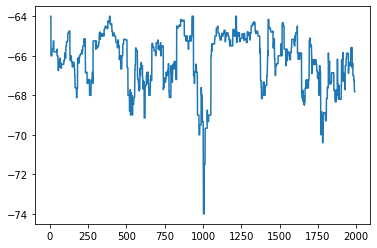

In [15]:
V1 = train_rolled[(train_rolled['X'] == 27.151600) & (train_rolled['Y'] == 8.15948)]
plt.plot(np.arange(V1.shape[0]), V1['DF231643E227'])
plt.show()

In [16]:
train_rolled.update(train_rolled.groupby(["X", "Y"])[scanners].ffill().fillna(-100))
train_rolled.drop("time", axis=1, inplace=True)

In [17]:
test.set_index("time", inplace=True)
test_rolled = test.groupby(["X", "Y"])[scanners].rolling(50, min_periods=1).mean().reset_index()

In [18]:
test_rolled.update(test_rolled.groupby(["X", "Y"])[scanners].ffill().fillna(-100))
test_rolled.drop("time", axis=1, inplace=True)

In [19]:
train_rolled

,X,Y,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C
0,14.0636,5.31235,-100.0,-100.0,-100.0,-100.0,-67.0,-100.000000,-100.000000,-100.0,-100.000000,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0
1,14.0636,5.31235,-100.0,-100.0,-100.0,-68.0,-67.0,-100.000000,-100.000000,-100.0,-100.000000,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0
2,14.0636,5.31235,-100.0,-100.0,-100.0,-68.0,-66.5,-100.000000,-100.000000,-100.0,-100.000000,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0
3,14.0636,5.31235,-100.0,-100.0,-100.0,-68.0,-67.0,-100.000000,-100.000000,-100.0,-100.000000,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.0,-100.00,-100.0
4,14.0636,5.31235,-100.0,-100.0,-100.0,-68.0,-67.0,-100.000000,-84.000000,-100.0,-100.000000,-100.0,-100.000000,-100.0,-100.0,-100.0,-100.0,-100.00,-71.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24132,29.6894,11.28600,-94.0,-78.5,-82.4,-85.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,-91.0,-61.375000,-82.0,-81.0,-94.0,-82.0,-71.80,-86.5
24133,29.6894,11.28600,-94.0,-78.5,-82.4,-85.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,-91.0,-61.285714,-79.5,-81.0,-94.0,-82.0,-71.80,-86.5
24134,29.6894,11.28600,-94.0,-78.5,-82.4,-85.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,-91.0,-61.285714,-79.5,-81.0,-94.0,-82.0,-71.25,-87.0
24135,29.6894,11.28600,-94.0,-78.5,-82.4,-87.0,-81.5,-68.142857,-77.666667,-93.0,-69.166667,-91.0,-61.285714,-79.5,-81.0,-94.0,-82.0,-71.00,-87.0


In [20]:
X_train = train_rolled.iloc[:, 2:]
y_train = train_rolled.iloc[:, :2]

X_test = test_rolled.iloc[:, 2:]
y_test = test_rolled.iloc[:, :2]

In [21]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train = y_train.values
y_test = y_test.values

In [22]:
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=[17]),
    layers.Dense(2, kernel_regularizer=regularizers.l2(1), activity_regularizer=regularizers.l1(1))
])

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                576       
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [24]:
EPOCHS = 500

checkpoint_path = "../Models/rolling_nn3/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=0)

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, validation_split=0.2, 
                    verbose=1, callbacks=[early_stop, tfdocs.modeling.EpochDots(), cp_callback])

Train on 19309 samples, validate on 4828 samples
Epoch 1/500
18848/19309 [============================>.] - ETA: 0s - loss: 118.1921 - mae: 7.3753 - mse: 97.6449 
Epoch: 0, loss:116.4790,  mae:7.2598,  mse:95.6370,  val_loss:84.2170,  val_mae:5.3421,  val_mse:48.3123,  
19309/19309 [==============================] - 1s 55us/sample - loss: 116.4790 - mae: 7.2598 - mse: 95.6370 - val_loss: 84.2170 - val_mae: 5.3421 - val_mse: 48.3123
Epoch 2/500
19309/19309 [==============================] - 1s 30us/sample - loss: 38.9715 - mae: 2.0412 - mse: 7.7056 - val_loss: 51.8416 - val_mae: 2.7332 - val_mse: 13.3964
Epoch 3/500
19309/19309 [==============================] - 1s 30us/sample - loss: 33.9126 - mae: 1.6341 - mse: 4.4079 - val_loss: 45.8487 - val_mae: 2.0283 - val_mse: 7.5415
Epoch 4/500
19309/19309 [==============================] - 1s 49us/sample - loss: 31.8298 - mae: 1.4523 - mse: 3.3084 - val_loss: 43.5116 - val_mae: 1.7962 - val_mse: 5.7330
Epoch 5/500
19309/19309 [================

19309/19309 [==============================] - 1s 30us/sample - loss: 27.7778 - mae: 1.0420 - mse: 1.3451 - val_loss: 40.1406 - val_mae: 1.6954 - val_mse: 3.7969
Epoch 47/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.7727 - mae: 1.0417 - mse: 1.3409 - val_loss: 40.0917 - val_mae: 1.5307 - val_mse: 3.2537
Epoch 48/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.7685 - mae: 1.0409 - mse: 1.3399 - val_loss: 40.1393 - val_mae: 1.6252 - val_mse: 3.5116
Epoch 49/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.7631 - mae: 1.0407 - mse: 1.3373 - val_loss: 40.2463 - val_mae: 1.7651 - val_mse: 4.0559
Epoch 50/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.7584 - mae: 1.0387 - mse: 1.3340 - val_loss: 39.8653 - val_mae: 1.5263 - val_mse: 3.3737
Epoch 51/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.7547 - mae: 1.0398 - mse: 1.3343 - val_loss: 40.0825

Epoch 93/500
19309/19309 [==============================] - 1s 29us/sample - loss: 27.6526 - mae: 1.0269 - mse: 1.2814 - val_loss: 39.8071 - val_mae: 1.5414 - val_mse: 3.2549
Epoch 94/500
19309/19309 [==============================] - 1s 29us/sample - loss: 27.6531 - mae: 1.0273 - mse: 1.2832 - val_loss: 39.8903 - val_mae: 1.6812 - val_mse: 3.6874
Epoch 95/500
19309/19309 [==============================] - 1s 29us/sample - loss: 27.6517 - mae: 1.0269 - mse: 1.2806 - val_loss: 39.8854 - val_mae: 1.6802 - val_mse: 3.6940
Epoch 96/500
19309/19309 [==============================] - 1s 29us/sample - loss: 27.6495 - mae: 1.0265 - mse: 1.2792 - val_loss: 39.6807 - val_mae: 1.4822 - val_mse: 3.2107
Epoch 97/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.6483 - mae: 1.0267 - mse: 1.2797 - val_loss: 39.8300 - val_mae: 1.4301 - val_mse: 2.8662
Epoch 98/500
19309/19309 [==============================] - 1s 29us/sample - loss: 27.6480 - mae: 1.0260 - mse: 1.2787 - val_

19309/19309 [==============================] - 1s 39us/sample - loss: 27.6138 - mae: 1.0214 - mse: 1.2602 - val_loss: 39.8698 - val_mae: 1.5823 - val_mse: 3.2978
Epoch 139/500
19309/19309 [==============================] - 1s 36us/sample - loss: 27.6130 - mae: 1.0208 - mse: 1.2592 - val_loss: 39.8171 - val_mae: 1.5850 - val_mse: 3.3666
Epoch 140/500
19309/19309 [==============================] - 1s 35us/sample - loss: 27.6128 - mae: 1.0217 - mse: 1.2603 - val_loss: 39.9190 - val_mae: 1.6360 - val_mse: 3.4811
Epoch 141/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.6127 - mae: 1.0218 - mse: 1.2595 - val_loss: 39.8904 - val_mae: 1.6223 - val_mse: 3.4911
Epoch 142/500
19309/19309 [==============================] - 1s 30us/sample - loss: 27.6105 - mae: 1.0212 - mse: 1.2569 - val_loss: 39.9708 - val_mae: 1.5727 - val_mse: 3.2526
Epoch 143/500
19309/19309 [==============================] - 1s 39us/sample - loss: 27.6109 - mae: 1.0211 - mse: 1.2583 - val_loss: 39

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
146,27.606146,1.020343,1.253937,40.283951,1.989391,4.976316,146
147,27.607242,1.020840,1.256233,39.876308,1.465753,2.959158,147
148,27.606923,1.020340,1.255386,40.011382,1.750870,3.914056,148
149,27.606639,1.020056,1.255203,39.749226,1.652160,3.627837,149
150,27.606290,1.021029,1.255870,39.798457,1.712480,3.850038,150


Text(0, 0.5, 'MAE')

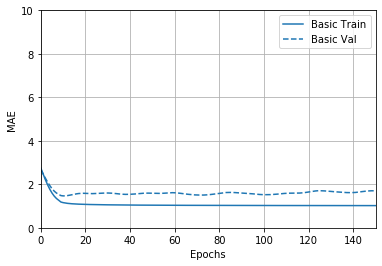

In [26]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE')

Text(0, 0.5, 'MSE')

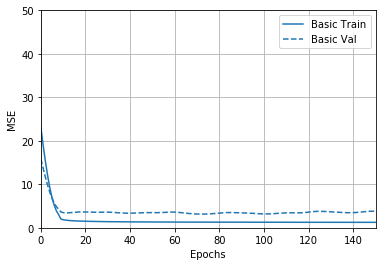

In [27]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 50])
plt.ylabel('MSE')

In [28]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)
print("Loss: {}".format(loss))
print("Mean absolute error: {}".format(mae))
print("Mean squared error: {}".format(mse))

6034/1 - 0s - loss: 35.5075 - mae: 1.2473 - mse: 2.4494
Loss: 30.899907669406243
Mean absolute error: 1.2473251819610596
Mean squared error: 2.4493908882141113


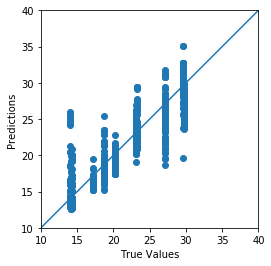

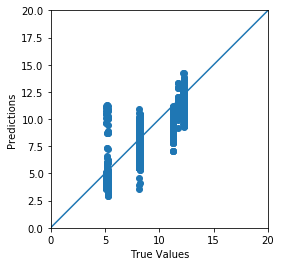

In [29]:
y_pred = model.predict(X_test).flatten().reshape((-1, 2))

a = plt.axes(aspect='equal')
plt.scatter(y_test[:, 0], y_pred[:, 0])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [10, 40]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

plt.figure()
a = plt.axes(aspect='equal')
plt.scatter(y_test[:, 1], y_pred[:, 1])
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 20]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [30]:
model.layers[0].get_weights()[1]

array([ 5.469971 , -1.6441737,  4.857835 ,  9.909416 , -6.448339 ,
       12.547086 , 13.083327 , 10.314756 ,  1.8548853,  5.0340605,
        4.013281 ,  5.177956 ,  7.3618426, 11.425791 ,  2.2172706,
       12.562662 , 11.415154 ,  9.809689 , 10.417314 , -8.562006 ,
        4.539745 ,  9.730225 , 13.108254 , 10.774197 , -2.0600731,
        5.6858125,  9.069074 ,  8.16914  , 10.220847 ,  9.440029 ,
        9.351275 , 11.66644  ], dtype=float32)

In [31]:
model.layers[1].get_weights()[1]

array([11.139061,  5.852047], dtype=float32)

In [32]:
joblib.dump(scaler, "../Models/rolling_nn3/scaler")

['../Models/rolling_nn3/scaler']